In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import adfuller
from time import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore','No frequency information was')

In [2]:
df=pd.read_csv('D:\\Data_sets\\time_series\\perrin-freres-monthly-champagne.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [3]:
df.rename(columns={'Month': 'date','Perrin Freres monthly champagne sales millions ?64-?72':'sales'}, inplace=True)

In [4]:
df

,date,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [5]:
df.isnull().sum()

date     1
sales    2
dtype: int64

In [6]:
df=df.loc[:104]

In [7]:
df

,date,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [8]:
df['date']=pd.to_datetime(df['date'])

<ipython-input-8-c85e97b4fa21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


In [9]:
df

,date,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [10]:
df.set_index('date', inplace=True)

In [11]:
df.head()

,sales
date,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [48]:
ts = df['sales']
ts.head()

date
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
Name: sales, dtype: float64

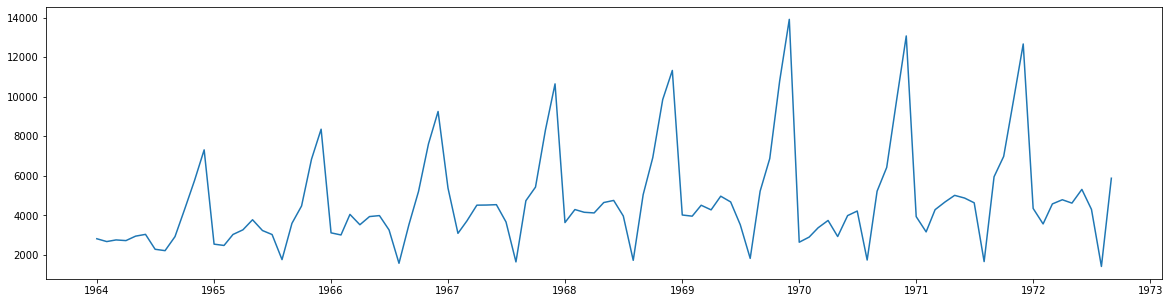

In [13]:
plt.plot(ts)

In [14]:
## we can se its a seasonal data

In [15]:
## ## ADA test for 95% confidence ( alpha is 0.05)

def adafuller_test(data, alpha):
    adfuller_result=adfuller(data)
    
    print(f'ADF Statistic: {adfuller_result[0]}\n')
    print(f'p-value: {adfuller_result[1]}\n')
    
    for key, value in adfuller_result[4].items():
        print(f'Critial Values: {key}, {value}')
    
    if adfuller_result[1] <= alpha:
        print(f"\nFor Significance level ({alpha}), there is Strong evidence against H0 , Reject H0, Time Series is Stationary")
    else:
        print(f"\nFor Significance level ({alpha}), there is Weak evidence against H0 , Fail to reject H0, Time Series is Not-Stationary ")
        

In [17]:
adafuller_test(ts, 0.05)

ADF Statistic: -1.8335930563276297

p-value: 0.3639157716602417

Critial Values: 1%, -3.502704609582561
Critial Values: 5%, -2.8931578098779522
Critial Values: 10%, -2.583636712914788

For Significance level (0.05), there is Weak evidence against H0 , Fail to reject H0, Time Series is Not-Stationary 


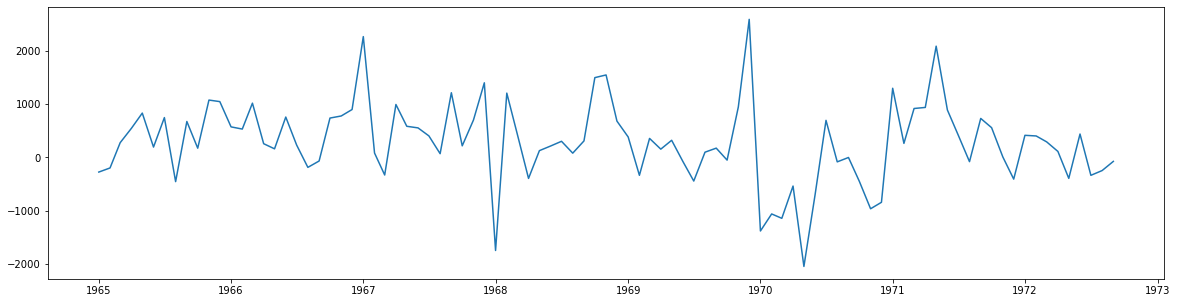

In [125]:
ts_diff = ts - ts.shift(12)
plt.plot(ts_diff)

In [126]:
ts_diff.dropna(inplace=True)

In [127]:
adafuller_test(ts_diff, 0.05)

ADF Statistic: -7.626619157213163

p-value: 2.060579696813685e-11

Critial Values: 1%, -3.503514579651927
Critial Values: 5%, -2.893507960466837
Critial Values: 10%, -2.583823615311909

For Significance level (0.05), there is Strong evidence against H0 , Reject H0, Time Series is Stationary


In [128]:
## ACF

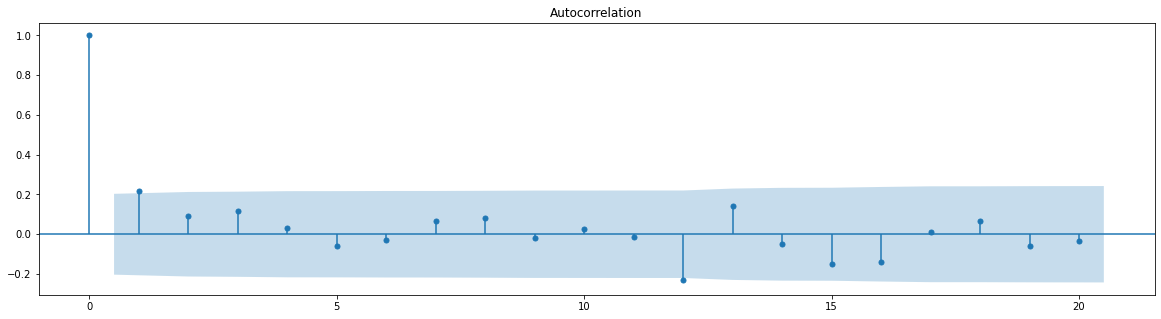

In [129]:
plot_acf(ts_diff)
plt.show()

In [130]:
## PACF

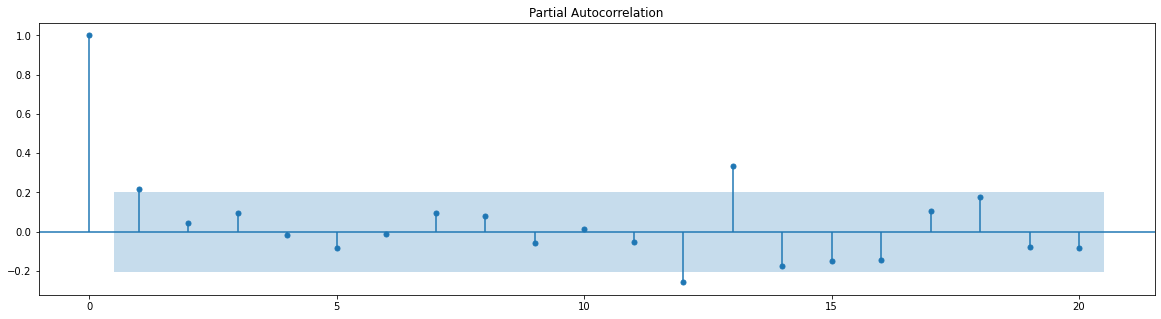

In [131]:
plot_pacf(ts_diff)
plt.show()

In [158]:
train_end = datetime(1971,9,1)
test_end = datetime(1972,9,1)

train_data = ts[:train_end]
test_data = ts[train_end + timedelta(days=1):test_end]

## ARIMA

In [159]:
# define model
model = ARIMA(ts, order=(1,1,1))

In [160]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.2360830307006836


In [161]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 02 Dec 2021   AIC                           1911.627
Time:                        00:34:35   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.314      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.0

In [162]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [163]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [164]:
residuals = test_data - predictions

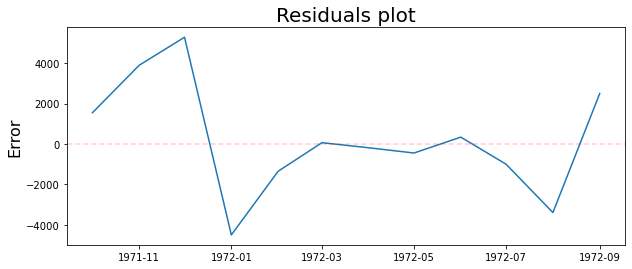

In [165]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals plot', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

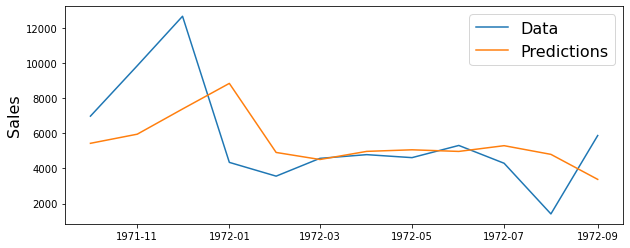

In [166]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.ylabel('Sales', fontsize=16)

In [167]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2686.8508919460437


## SARIMA

In [175]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(ts, order=my_order, seasonal_order=my_seasonal_order)

In [176]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Model Fitting Time: 0.2540571689605713


In [177]:
#summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                sales   No. Observations:                  105
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -879.896
Date:                              Thu, 02 Dec 2021   AIC                           1765.792
Time:                                      00:38:01   BIC                           1773.725
Sample:                                  01-01-1964   HQIC                          1769.006
                                       - 09-01-1972                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9570      0.035     27.332      0.000       0.888       1.026
ma.S.L12      -0.26

In [178]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

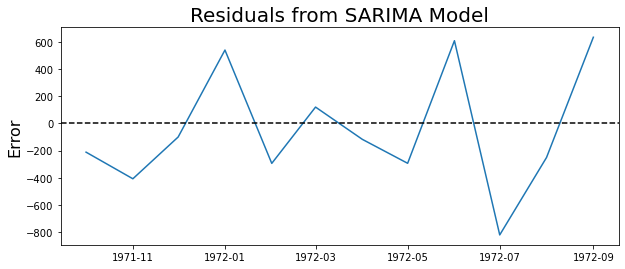

In [179]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Sales')

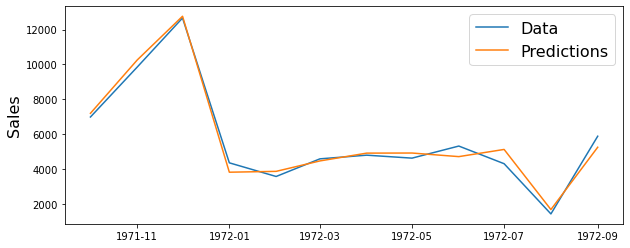

In [180]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.ylabel('Sales', fontsize=16)

In [181]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 429.7144880555328
